In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [2]:
df = pd.read_csv("california_house.csv")

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


All are non-null values.

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  9


## Train the dataset

In [5]:
from sklearn.model_selection import train_test_split
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [6]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: SalePrice, Length: 20640, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [10]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: SalePrice, Length: 16512, dtype: float64

In [11]:
data_train = x_train.join(y_train)

In [12]:
data_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965
...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.292
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.978
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.221
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.835


Get the histogram of the trained data set

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

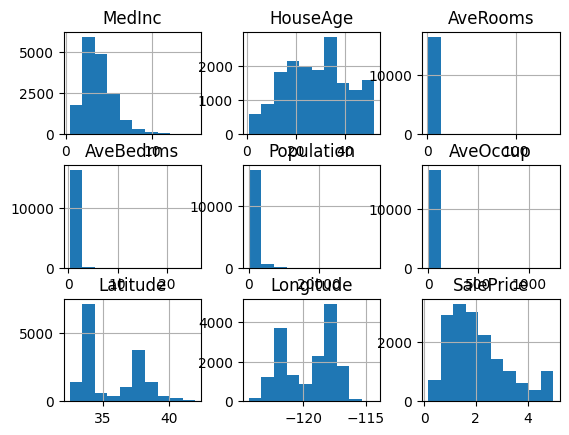

In [13]:
data_train.hist()

Take the correlation matrix

In [14]:
df_cor= data_train.corr()
df_cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
MedInc,1.000000,-0.121711,0.336013,-0.072550,0.004122,0.022061,-0.076571,-0.017040,0.690647
HouseAge,-0.121711,1.000000,-0.160892,-0.087983,-0.292283,0.016245,0.005296,-0.101818,0.103706
AveRooms,0.336013,-0.160892,1.000000,0.836163,-0.073733,-0.004922,0.110695,-0.029339,0.158485
AveBedrms,-0.072550,-0.087983,0.836163,1.000000,-0.071267,-0.006035,0.073161,0.016647,-0.051351
Population,0.004122,-0.292283,-0.073733,-0.071267,1.000000,0.072330,-0.102499,0.094276,-0.026032
AveOccup,0.022061,0.016245,-0.004922,-0.006035,0.072330,1.000000,0.005837,-0.000598,-0.022030
Latitude,-0.076571,0.005296,0.110695,0.073161,-0.102499,0.005837,1.000000,-0.924485,-0.142983
Longitude,-0.017040,-0.101818,-0.029339,0.016647,0.094276,-0.000598,-0.924485,1.000000,-0.046349
SalePrice,0.690647,0.103706,0.158485,-0.051351,-0.026032,-0.022030,-0.142983,-0.046349,1.000000


<Axes: >

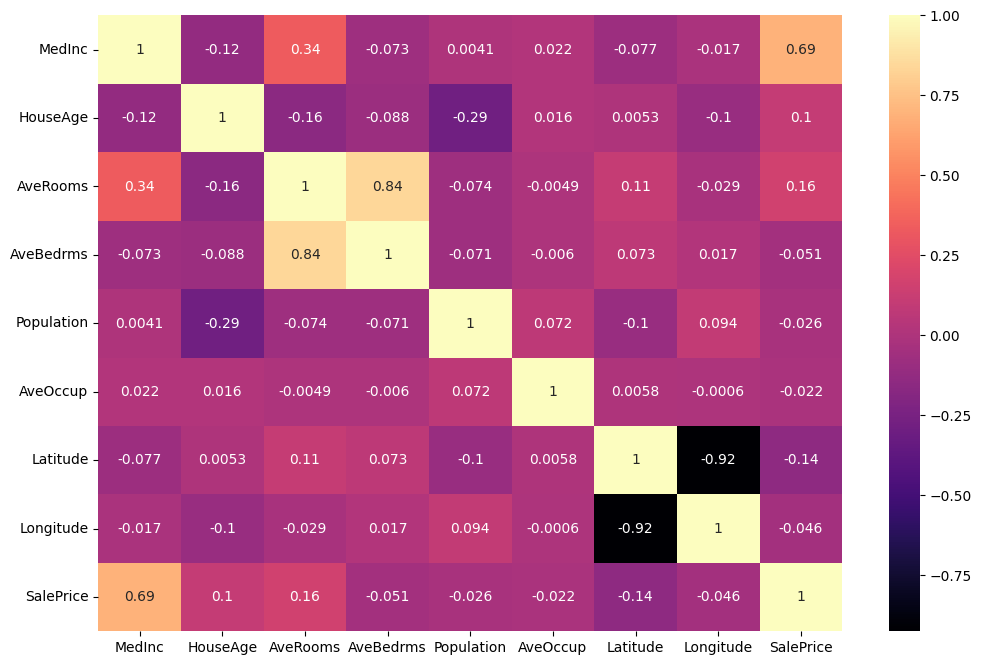

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cor, annot=True, cmap="magma")

## Data Preprocessing

In [16]:
data_train['AveRooms'] = np.log(data_train['AveRooms']+1)
data_train['AveBedrms'] = np.log(data_train['AveBedrms']+1)
data_train['Population'] = np.log(data_train['Population']+1)
data_train['AveOccup'] = np.log(data_train['AveOccup']+1)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

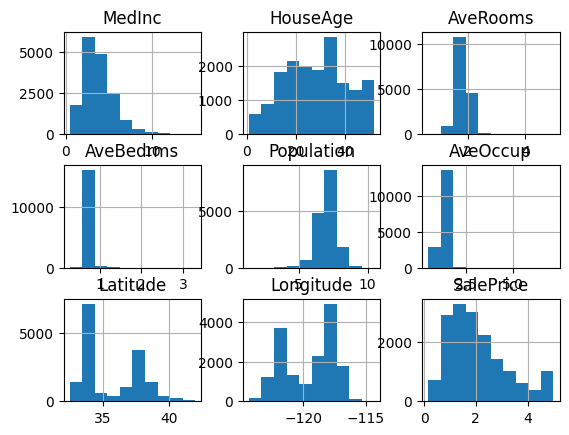

In [17]:
data_train.hist()


<Axes: xlabel='Latitude', ylabel='Longitude'>

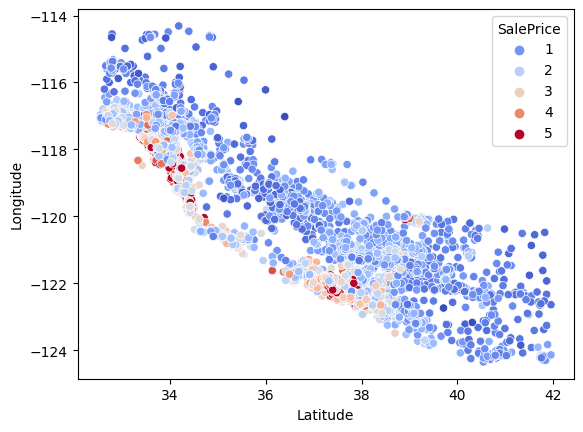

In [18]:
plt.figure()
sns.scatterplot(x='Latitude', y='Longitude', data= data_train, hue= 'SalePrice', palette ='coolwarm')

<Axes: >

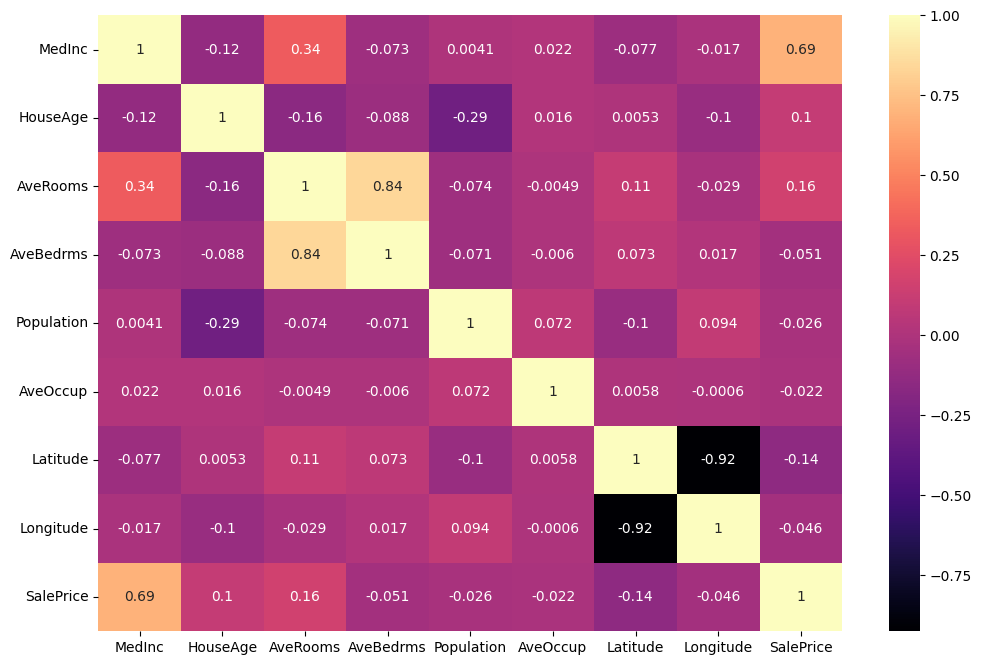

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cor, annot=True, cmap="magma")

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
x_train = data_train.drop(['SalePrice'], axis=1)
y_train = data_train['SalePrice']
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [21]:
data_test = x_test.join(y_test)

In [22]:
data_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22,2.63300
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83,2.66800
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05,5.00001
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76,0.72300


In [23]:
data_test['AveRooms'] = np.log(data_test['AveRooms']+1)
data_test['AveBedrms'] = np.log(data_test['AveBedrms']+1)
data_test['Population'] = np.log(data_test['Population']+1)
data_test['AveOccup'] = np.log(data_test['AveOccup']+1)

In [24]:
x_test = data_test.drop(['SalePrice'], axis=1)
y_test = data_test['SalePrice']

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [26]:
model1.score(x_test, y_test)


0.6437342932018937

## Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor()
model2.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
model2.score(x_test, y_test)

0.806819709478155

In [29]:
from sklearn.model_selection import GridSearchCV
para_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [3, 6, 9, 12],
}
grid_search = GridSearchCV(estimator=model2, param_grid=para_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [3, 6, 9, 12],
                         'n_estimators': [50, 100, 200]})

In [31]:
best_forest = grid_search.best_estimator_


In [34]:
best_forest.score(X_test_scaled, y_test)

0.8179326196898933